In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing

In [38]:
data = pd.read_csv("Housing.csv").sample(frac=1)


Encoding

In [39]:
data = data.replace(["yes","no"], [0, 1])

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
x=np.array(data['furnishingstatus']).reshape(-1,1)
encoded = enc.fit_transform(X=x, y=None).toarray()
encoded = pd.DataFrame(encoded, columns=['furnished', 'semi_furnished', 'unfurnished'])
data = data.drop('furnishingstatus', axis = 1)
data = pd.concat([data, encoded], axis=1)

data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi_furnished,unfurnished
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,0.0,1.0,0.0
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,0.0,1.0,0.0
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,0.0,1.0,0.0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,0.0,1.0,0.0
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,0.0,1.0,0.0
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1.0,0.0,0.0
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,1.0,0.0,0.0
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,1.0,0.0,0.0


In [40]:
data['Price'] = data.iloc[:,0]
data = data.drop('price', axis = 1) 

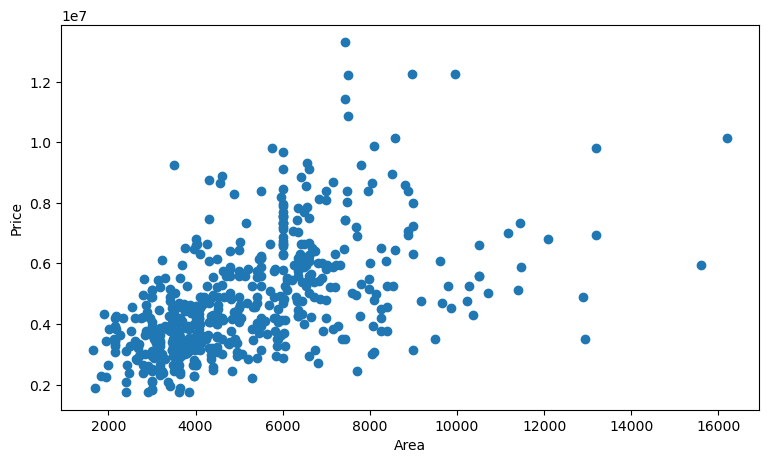

In [41]:
data_plot = data.sort_values(by='area')

plt.figure(figsize=(9,5))
plt.plot(data_plot['area'], data_plot['Price'], marker ='o', linewidth=0)
plt.xlabel('Area')
plt.ylabel('Price')

plt.show()


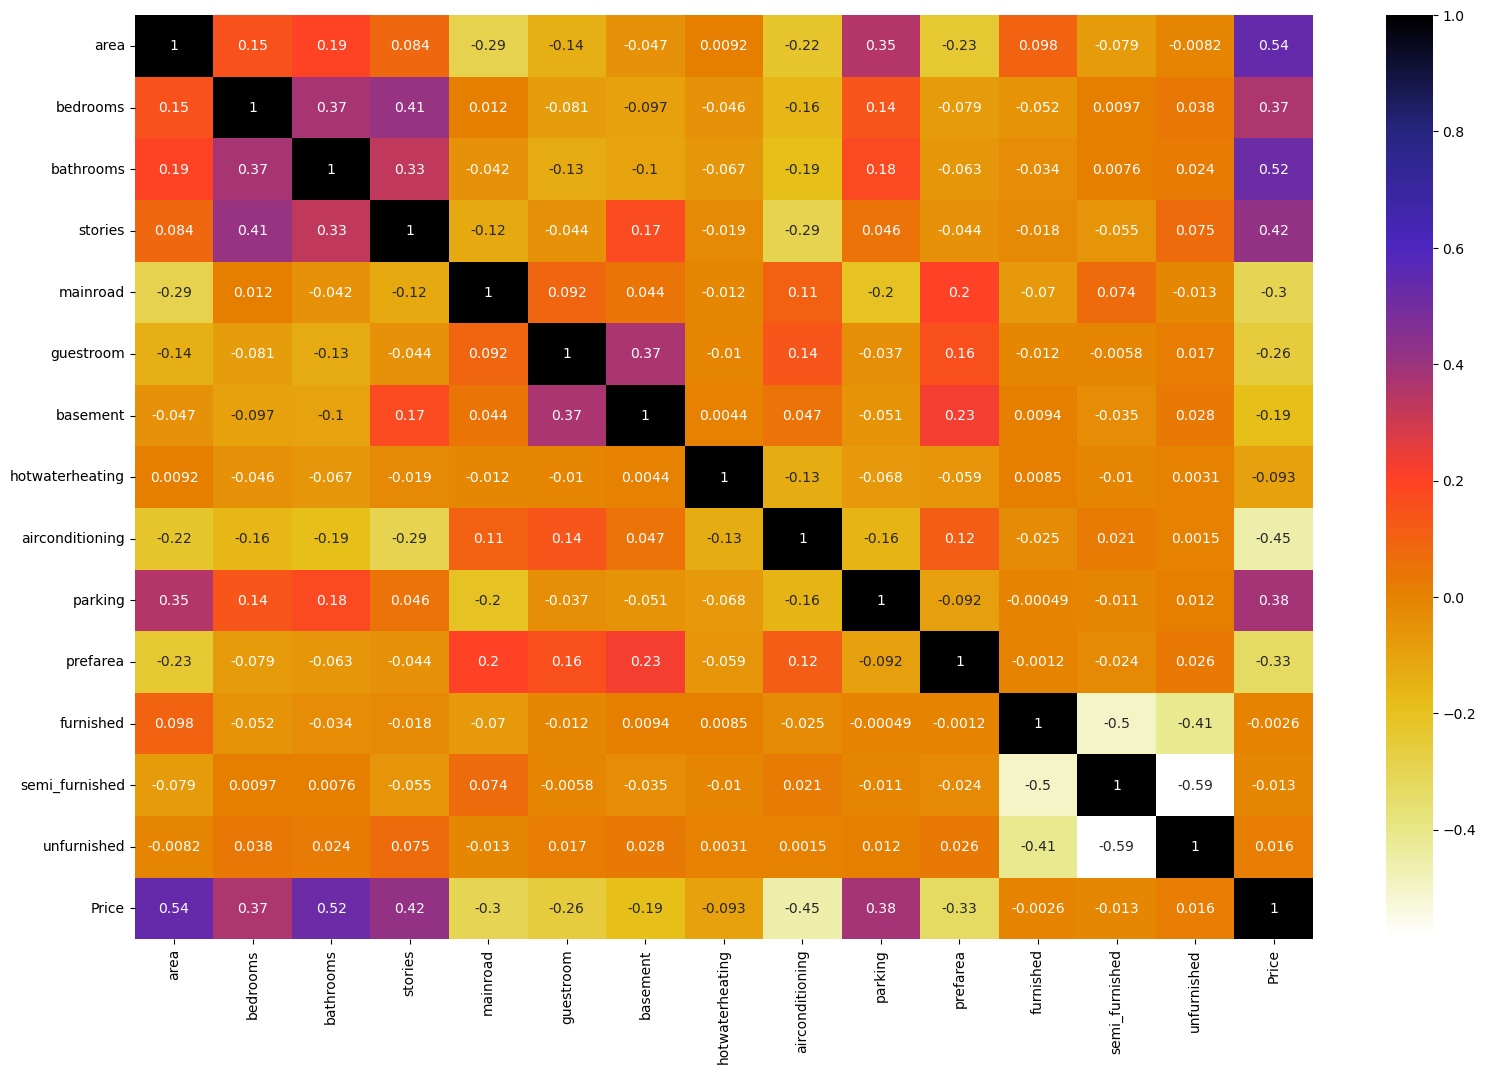

In [42]:
cor = data.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

Scaling

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(data)
data1=pd.DataFrame(scaler.transform(data))
data1 = data1.set_axis(data.columns, axis=1)


Parameter tuning with cross validation

In [44]:
from kNN_Regressor import KNNRegressor,knnCV
from kNN_Regressor_Weighted import KNNRegressor_weighted

neighbors = np.arange (3,13,1)
folds = 10
r2, mse, rmse, mae = knnCV(data1, 'Price', neighbors, folds)

metric:  euclidean
number of neighbors:  3
number of neighbors:  4
number of neighbors:  5
number of neighbors:  6
number of neighbors:  7
number of neighbors:  8
number of neighbors:  9
number of neighbors:  10
number of neighbors:  11
number of neighbors:  12
metric:  manhattan
number of neighbors:  3
number of neighbors:  4
number of neighbors:  5
number of neighbors:  6
number of neighbors:  7
number of neighbors:  8
number of neighbors:  9
number of neighbors:  10
number of neighbors:  11
number of neighbors:  12


Heatmaps

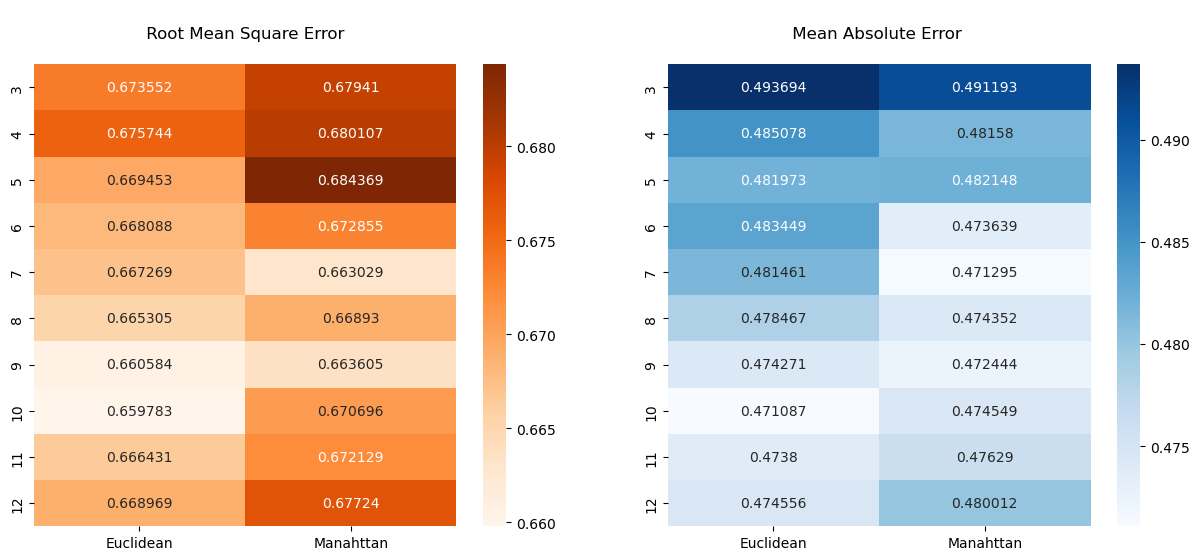

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,6))

fig = plt.gcf()


plt.subplot(121)
plt.title('R2 score \n')
sns.heatmap(r2 ,annot=True,cmap='Greens', fmt='g')
plt.xticks([0.5, 1.5], ['Euclidean', 'Manahttan'])
plt.yticks(np.arange(0.5,10.5),neighbors)
plt.xlabel("\n")

plt.subplot(122)
plt.title('Mean Square Error  \n')
sns.heatmap(mse ,annot=True,cmap='Reds', fmt='g')
plt.xticks([0.5, 1.5], ['Euclidean', 'Manahttan'])
plt.yticks(np.arange(0.5,10.5),neighbors)
plt.xlabel("\n")

plt.subplot(121)
plt.title('\n Root Mean Square Error \n')
sns.heatmap(rmse ,annot=True,cmap='Oranges', fmt='g')
plt.xticks([0.5, 1.5], ['Euclidean', 'Manahttan'])
plt.yticks(np.arange(0.5,10.5),neighbors)

plt.subplot(122)
plt.title('\n Mean Absolute Error  \n')
sns.heatmap(mae ,annot=True,cmap='Blues', fmt='g')
plt.xticks([0.5, 1.5], ['Euclidean', 'Manahttan'])
plt.yticks(np.arange(0.5,10.5),neighbors)

plt.savefig('tuning2.png', dpi=600)

plt.show()


Holdout

In [47]:
# Loading help packages!
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = np.asarray(data1.drop(['Price'], axis=1).astype(float))
y = np.asarray(data1['Price'].astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 1)

Not weighted

In [48]:
# instantiate
knn = KNNRegressor(k = 7, metric = 'manhattan')

# fit
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.5779371884322234
MSE:  0.507520280164821
RMSE:  0.7124045761818357
MAE:  0.5243718231398806


Weighted

In [49]:
# instantiate
knn = KNNRegressor_weighted(k = 7, metric = 'manhattan')

# fit
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', mean_squared_error(y_test, y_pred)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred))

R2 score:  0.0038259518885565003
MSE:  1.1978750985248927
RMSE:  1.0944748048835535
MAE:  0.8207629811245873


Comparison with sklearn kNN

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor

knn_skl = KNeighborsRegressor (n_neighbors= 7, metric='manhattan')

# fit
knn_skl.fit(X_train, y_train)
y_pred_knn_skl = knn_skl.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_knn_skl))
print('MSE: ', mean_squared_error(y_test, y_pred_knn_skl))
print('RMSE: ', mean_squared_error(y_test, y_pred_knn_skl)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred_knn_skl))

R2 score:  0.5779371884322234
MSE:  0.507520280164821
RMSE:  0.7124045761818357
MAE:  0.5243718231398806


Comparison with sklearn Lin Reg

In [51]:
from sklearn.linear_model import LinearRegression

parameters = {'fit_intercept':[True, False]}
lr = LinearRegression()
gs = GridSearchCV(lr, parameters, cv=10)
gs.fit(X, y)
print(gs.best_estimator_)

LinearRegression(fit_intercept=False)


In [52]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression (fit_intercept=False)

# fit
lr.fit(X_train, y_train)
y_pred_rl = lr.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_rl))
print('MSE: ', mean_squared_error(y_test, y_pred_rl))
print('RMSE: ', mean_squared_error(y_test, y_pred_rl)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred_rl))

R2 score:  0.6083484558132943
MSE:  0.4709514697451664
RMSE:  0.6862590398276488
MAE:  0.4923140001464431


Comparison with sklearn Reg Tree

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':[1,2,3,4,5,6,7,8], 'min_samples_leaf':[1,2,3,5,6,7,8,9,10,11,12,13]}
dtr = DecisionTreeRegressor()
gs = GridSearchCV(dtr, parameters, refit = True, cv= 10)
gs.fit(X, y)
print(gs.best_estimator_)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10)


In [54]:
dtr = DecisionTreeRegressor (max_depth = 4, min_samples_leaf = 10 )

# fit
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print('R2 score: ', r2_score(y_test, y_pred_dtr))
print('MSE: ', mean_squared_error(y_test, y_pred_dtr))
print('RMSE: ', mean_squared_error(y_test, y_pred_dtr)**0.5)
print('MAE: ', mean_absolute_error(y_test, y_pred_dtr))

R2 score:  0.558613580733297
MSE:  0.53075644910547
RMSE:  0.7285303350619451
MAE:  0.5380339456589129
